In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/nlp_sarcasm/train.csv')
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


In [4]:
# prompt: from the data, in the tweets columns, I have the hashtags as well. Make a seperate column of those.'

import re

def extract_hashtags(text):
  hashtags = re.findall(r"#(\w+)", text)
  return hashtags

df['hashtags'] = df['tweets'].apply(extract_hashtags)


In [5]:
# prompt: now remove all those hashtags and then remove the tags made for in the tweets.

def extract_hashtags(text):
  hashtags = re.findall(r"#(\w+)", text)
  return hashtags

df['hashtags'] = df['tweets'].apply(extract_hashtags)


def remove_hashtags(text):
  return re.sub(r"#\w+", "", text)

def remove_tags(text):
  return re.sub(r"<[^>]+>", "", text)

df['tweets'] = df['tweets'].apply(remove_hashtags)
df['tweets'] = df['tweets'].apply(remove_tags)


In [6]:
# prompt: in the comments columns, I have a few tags starting with @ followed by some user name. Remove those usernames.

def remove_usernames(text):
  return re.sub(r"@\w+", "", text)

df['tweets'] = df['tweets'].apply(remove_hashtags)
df['tweets'] = df['tweets'].apply(remove_tags)
df['tweets'] = df['tweets'].apply(remove_usernames)

df


,tweets,class,hashtags
0,Be aware dirty step to get money @… htt...,figurative,"[staylight, staywhite, sarcastic, moralneeded]"
1,for who don't understand http://t.co/rtyYm...,figurative,"[sarcasm, people, diy, artattack]"
2,readers being sensible as always,figurative,"[DailyMail, shocker, sarcastic, dailyfail, inH..."
3,Why do I get the feeling you like games?,figurative,[sarcasm]
4,- You probably just missed the text.,figurative,[sarcastic]
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm,"[childhood, cool, funny, sarcasm]"
81404,I never knew..I better put this out to the Uni...,sarcasm,"[Jokes, Sarcasm]"
81405,hey just wanted to say thanks @ puberty for le...,sarcasm,"[urock, sarcasm]"
81406,I'm sure coverage like the Fox News Special “T...,sarcasm,[sarcasm]


In [7]:
# prompt: In the class column. drop the values "figurative", change irony to sarcasm and keep sarcasm as it is. Change regular to non-sarcastic.

df['class'] = df['class'].replace(['figurative'], np.nan)
df['class'] = df['class'].replace(['irony'], 'Sarcastic')
df['class'] = df['class'].replace(['sarcasm'], 'Sarcastic')
df['class'] = df['class'].replace(['regular'], 'Non-Sarcastic')
df

,tweets,class,hashtags
0,Be aware dirty step to get money @… htt...,NaN,"[staylight, staywhite, sarcastic, moralneeded]"
1,for who don't understand http://t.co/rtyYm...,NaN,"[sarcasm, people, diy, artattack]"
2,readers being sensible as always,NaN,"[DailyMail, shocker, sarcastic, dailyfail, inH..."
3,Why do I get the feeling you like games?,NaN,[sarcasm]
4,- You probably just missed the text.,NaN,[sarcastic]
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,Sarcastic,"[childhood, cool, funny, sarcasm]"
81404,I never knew..I better put this out to the Uni...,Sarcastic,"[Jokes, Sarcasm]"
81405,hey just wanted to say thanks @ puberty for le...,Sarcastic,"[urock, sarcasm]"
81406,I'm sure coverage like the Fox News Special “T...,Sarcastic,[sarcasm]


In [8]:
# prompt: drop the rows containing NaN in the class column.

df = df.dropna(subset=['class'])
df


,tweets,class,hashtags
21238,"Fav moment in Sepp Blatter vid (0:20): ""We hav...",Sarcastic,[irony]
21239,Just found this while walking my human.... h...,Sarcastic,"[irony, Detroit]"
21240,Disrespected the wife of Prophet' - pseudo lib...,Sarcastic,[Irony]
21241,Do you know that super yeay satisfying feeling...,Sarcastic,"[life, goals, irony]"
21242,If you're going to call someone ignorant and s...,Sarcastic,[irony]
...,...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,Sarcastic,"[childhood, cool, funny, sarcasm]"
81404,I never knew..I better put this out to the Uni...,Sarcastic,"[Jokes, Sarcasm]"
81405,hey just wanted to say thanks @ puberty for le...,Sarcastic,"[urock, sarcasm]"
81406,I'm sure coverage like the Fox News Special “T...,Sarcastic,[sarcasm]


In [9]:
df['class'].value_counts()

,count
class,
Sarcastic,41575
Non-Sarcastic,18595


In [10]:
# prompt: create a new dataframe and select equal records from sarcastic as that of non-sarcastic.

# Create a new DataFrame with only Non-Sarcastic tweets
non_sarcastic_df = df[df['class'] == 'Non-Sarcastic']

# Get the number of Non-Sarcastic tweets
num_non_sarcastic = len(non_sarcastic_df)

# Create a new DataFrame with only Sarcastic tweets
sarcastic_df = df[df['class'] == 'Sarcastic']

# Sample Sarcastic tweets to match the number of Non-Sarcastic tweets
sampled_sarcastic_df = sarcastic_df.sample(n=num_non_sarcastic, random_state=42)

# Concatenate the sampled Sarcastic and Non-Sarcastic DataFrames
balanced_df = pd.concat([sampled_sarcastic_df, non_sarcastic_df])

# Shuffle the rows of the new DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the class distribution in the new DataFrame
print(balanced_df['class'].value_counts())

new_df = balanced_df


class
Sarcastic        18595
Non-Sarcastic    18595
Name: count, dtype: int64


In [11]:
new_df

,tweets,class,hashtags
0,"Visiting family, wearing sin to church......",Sarcastic,"[lipstick, irony, somethingisntright]"
1,posted not without awareness of https://t.co...,Sarcastic,"[budapestfood, irony]"
2,Great property maintenance and upkeep here. (...,Sarcastic,[sarcasm]
3,looking forward to tomorrow like a hole in the...,Sarcastic,"[ironic, banterQUEEN, notthatfunny, wherehas6m..."
4,"of """" in the :an issue is various ""Guru"" aca...",Non-Sarcastic,"[Definition, strategy, business, literature, e..."
...,...,...,...
37185,With At Early Morning On Preach Viewers . ....,Sarcastic,"[Sarcasm, IndependenceDay, SaffronOrGreen]"
37186,I think the big question we are missing is w...,Sarcastic,[Sarcasm]
37187,"But then, 98% Muslims vote for the so called '...",Sarcastic,[Irony]
37188,"Yes, it's really THIS easy",Sarcastic,[sarcasm]


In [15]:
import nltk
from nltk.tokenize import word_tokenize  # Import word_tokenize
from nltk.corpus import stopwords  # Import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer  # Import stemmer and lemmatizer

# Download 'punkt_tab' data
nltk.download('punkt_tab')

# Download other required resources for word tokenization, stop word removal, and lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # Download required resources for lemmatization

def preprocess_text(text):
  # Tokenization
  tokens = word_tokenize(text.lower())

  # Stop word removal
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [token for token in tokens if token not in stop_words]

  # Stemming
  stemmer = PorterStemmer()
  stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

  # Anti-cliticization (remove apostrophes and contractions)
  processed_tokens = [token.replace("'s", "").replace("'re", "").replace("'ve", "").replace("'ll", "").replace("'d", "").replace("n't", "") for token in lemmatized_tokens]

  # Join tokens back into a string
  processed_text = ' '.join(processed_tokens)

  return processed_text


# Apply preprocessing to the 'tweets' column
new_df['tweets'] = new_df['tweets'].apply(preprocess_text)

print(new_df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              tweets          class  \
0              visit famili , wear sin church ......      Sarcastic   
1         post without awar http : //t.co/e4kgcdgnlj      Sarcastic   
2  great properti mainten upkeep . ( @ safari mot...      Sarcastic   
3          look forward tomorrow like hole head 👍🏼👍🏼      Sarcastic   
4  `` '' : issu variou `` guru '' academ promot t...  Non-Sarcastic   

                                            hashtags  
0              [lipstick, irony, somethingisntright]  
1                              [budapestfood, irony]  
2                                          [sarcasm]  
3  [ironic, banterQUEEN, notthatfunny, wherehas6m...  
4  [Definition, strategy, business, literature, e...  


In [16]:
# prompt: Apply any more pre-processing techniques if needed any

def remove_punctuation(text):
  """Removes punctuation from a string."""
  return re.sub(r'[^\w\s]', '', text)

# Apply punctuation removal to the 'tweets' column
new_df['tweets'] = new_df['tweets'].apply(remove_punctuation)

print(new_df.head())
new_df


                                              tweets          class  \
0                     visit famili  wear sin church       Sarcastic   
1              post without awar http  tcoe4kgcdgnlj      Sarcastic   
2  great properti mainten upkeep    safari motel ...      Sarcastic   
3              look forward tomorrow like hole head       Sarcastic   
4     issu variou  guru  academ promot theoret ap...  Non-Sarcastic   

                                            hashtags  
0              [lipstick, irony, somethingisntright]  
1                              [budapestfood, irony]  
2                                          [sarcasm]  
3  [ironic, banterQUEEN, notthatfunny, wherehas6m...  
4  [Definition, strategy, business, literature, e...  


,tweets,class,hashtags
0,visit famili wear sin church,Sarcastic,"[lipstick, irony, somethingisntright]"
1,post without awar http tcoe4kgcdgnlj,Sarcastic,"[budapestfood, irony]"
2,great properti mainten upkeep safari motel ...,Sarcastic,[sarcasm]
3,look forward tomorrow like hole head,Sarcastic,"[ironic, banterQUEEN, notthatfunny, wherehas6m..."
4,issu variou guru academ promot theoret ap...,Non-Sarcastic,"[Definition, strategy, business, literature, e..."
...,...,...,...
37185,earli morn preach viewer no import intent,Sarcastic,"[Sarcasm, IndependenceDay, SaffronOrGreen]"
37186,think big question miss injuri jersey sale year,Sarcastic,[Sarcasm]
37187,98 muslim vote call ecular parti http tco3...,Sarcastic,[Irony]
37188,ye realli easi,Sarcastic,[sarcasm]


In [17]:
# prompt: In the class column, rename the value Sarcastic to 1 and Non-Sarcastic to 0

# Replace 'Sarcastic' with 1 and 'Non-Sarcastic' with 0 in the 'class' column
new_df['class'] = new_df['class'].replace({'Sarcastic': 1, 'Non-Sarcastic': 0})

print(new_df.head())

                                              tweets  class  \
0                     visit famili  wear sin church       1   
1              post without awar http  tcoe4kgcdgnlj      1   
2  great properti mainten upkeep    safari motel ...      1   
3              look forward tomorrow like hole head       1   
4     issu variou  guru  academ promot theoret ap...      0   

                                            hashtags  
0              [lipstick, irony, somethingisntright]  
1                              [budapestfood, irony]  
2                                          [sarcasm]  
3  [ironic, banterQUEEN, notthatfunny, wherehas6m...  
4  [Definition, strategy, business, literature, e...  


<ipython-input-17-1e922787ece3>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['class'] = new_df['class'].replace({'Sarcastic': 1, 'Non-Sarcastic': 0})


In [18]:
# prompt: remove the column hashtags

# Remove the 'hashtags' column
if 'hashtags' in new_df.columns:
  new_df = new_df.drop('hashtags', axis=1)

print(new_df.head())


                                              tweets  class
0                     visit famili  wear sin church       1
1              post without awar http  tcoe4kgcdgnlj      1
2  great properti mainten upkeep    safari motel ...      1
3              look forward tomorrow like hole head       1
4     issu variou  guru  academ promot theoret ap...      0


**Random Forest**

In [19]:
# prompt: Use Random Forest Model on this data to predict sarcastic comment and give sarcasm percentage with model accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report
import re # Import re for regex operations

# Assuming 'new_df' is your preprocessed DataFrame
X = new_df['tweets']
y = new_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


def predict_sarcasm_percentage_rf(text):
  """Predicts the sarcasm percentage for a given text using Random Forest."""

  # Preprocess the input text
  processed_text = preprocess_text(text)
  processed_text = remove_punctuation(processed_text)

  # Transform the text using the TF-IDF vectorizer
  text_tfidf = tfidf_vectorizer.transform([processed_text])

  # Make a prediction using the trained model
  prediction = rf_classifier.predict_proba(text_tfidf)[0]

  # Return the probability of the text being sarcastic
  return prediction[1] * 100


# Example usage:
text_to_predict = "Ah! I love Mondays so much"
sarcasm_percentage = predict_sarcasm_percentage_rf(text_to_predict)
print(f"Sarcasm Percentage for '{text_to_predict}': {sarcasm_percentage:.2f}%")


text_to_predict = "On my way to the hospital yay really excited!"
sarcasm_percentage = predict_sarcasm_percentage_rf(text_to_predict)
print(f"Sarcasm Percentage for '{text_to_predict}': {sarcasm_percentage:.2f}%")

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3708
           1       0.80      0.81      0.80      3730

    accuracy                           0.80      7438
   macro avg       0.80      0.80      0.80      7438
weighted avg       0.80      0.80      0.80      7438

Sarcasm Percentage for 'Ah! I love Mondays so much': 94.00%
Sarcasm Percentage for 'On my way to the hospital yay really excited!': 98.00%


In [ ]:
import pickle
import json

# Define filenames
model_filename = "sarcasm_random_forest_nb_model.pkl"
vectorizer_filename = "tfidf_vectorizer.pkl"
params_filename = "sarcasm_random_forest_params.json"

# Save the trained model as a pickle file
with open(model_filename, "wb") as file:
    # pickle.dump(nb_classifier, file)  # Changed this line
    pickle.dump(rf_classifier, file)  # To save the RandomForestClassifier object

# Save the TF-IDF vectorizer as a pickle file
with open(vectorizer_filename, "wb") as file:
    pickle.dump(tfidf_vectorizer, file)

# Save model parameters as a JSON file
# model_params = nb_classifier.get_params()  # Changed this line
model_params = rf_classifier.get_params()  # To get parameters from RandomForestClassifier
with open(params_filename, "w") as file:
    json.dump(model_params, file)

print("✅ Model, vectorizer, and parameters saved successfully!")

In [ ]:
from google.colab import files

# Download Pickle files and JSON file
files.download(model_filename)
files.download(vectorizer_filename)
files.download(params_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

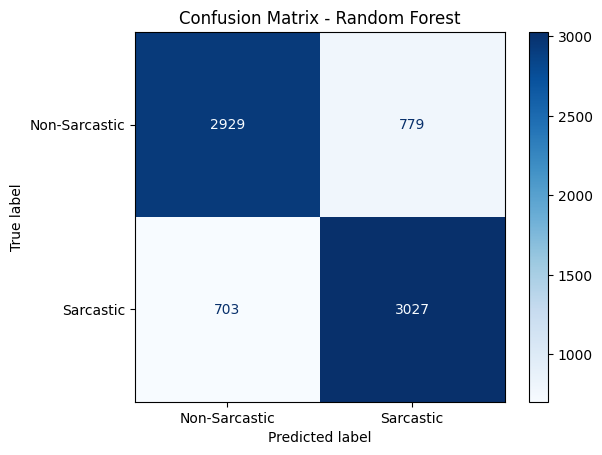

In [22]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Sarcastic', 'Sarcastic'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

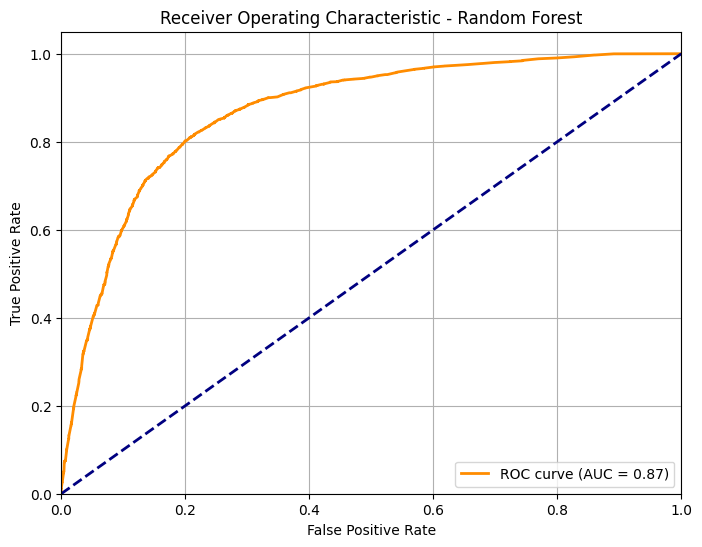

In [23]:
# Get predicted probabilities for ROC curve (probability of class 1)
y_proba = rf_classifier.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()